In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings(action='ignore')

# 데이터 셋 로딩

In [3]:
# 챌린처 랭크에서 15분 게임데이터 셋을 불러옵니다.
lol = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/Challenger_Ranked_Games_15minute.csv")
lol

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,24081,1190,44,8.8,309,74,0,8,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,4247155821,1,24162,2212,46,9.2,393,64,0,5,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,4243963257,0,22413,1563,41,8.2,300,62,0,5,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,4241678498,0,23837,3197,46,9.2,370,96,0,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,4241538868,1,27688,3663,44,8.8,381,66,0,9,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,4143231833,0,26110,1535,46,9.2,289,73,0,15,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26830,4157911901,0,57503,3293,62,12.4,329,28,0,27,...,[],6,2,1,3,1,0,[],0,0
26831,3764171638,0,26091,2986,47,9.4,338,86,0,7,...,[],0,0,0,0,0,0,[],0,0
26832,4110201724,1,24734,4289,45,9.0,328,64,0,11,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


# gameId칼럼 제거

In [4]:
# gameId 칼럼을 제거해 줍니다.
lol.drop("gameId", axis=1, inplace = True)
lol

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,0,22413,1563,41,8.2,300,62,0,5,20,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26830,0,57503,3293,62,12.4,329,28,0,27,37,...,[],6,2,1,3,1,0,[],0,0
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,[],0,0,0,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


# 블루팀, 레드팀으로 데이터 셋 분리

In [5]:
# 블루팀 정보와 레드팀의 정보를 나눠줍니다.
blue_lol = lol.iloc[:, :25]
red_lol = lol.iloc[:, 25:]
display(blue_lol)
display(red_lol)

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,[],0,0,0,0,0,0,[],0,0
1,1,24162,2212,46,9.2,393,64,0,5,6,...,[],0,0,0,0,0,0,[],0,1
2,0,22413,1563,41,8.2,300,62,0,5,20,...,[],0,0,0,0,0,0,[],0,0
3,0,23837,3197,46,9.2,370,96,0,6,13,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
4,1,27688,3663,44,8.8,381,66,0,9,10,...,[],1,0,1,0,0,1,['WATER_DRAGON'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,[],0,0,0,0,0,0,['EARTH_DRAGON'],1,0
26830,0,57503,3293,62,12.4,329,28,0,27,37,...,['TOP_LANE'],5,3,2,0,1,1,"['WATER_DRAGON', 'AIR_DRAGON', 'FIRE_DRAGON']",3,0
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,[],0,0,0,0,0,1,['FIRE_DRAGON'],1,0


,redWins,redTotalGolds,redCurrentGolds,redTotalLevel,redAvgLevel,redTotalMinionKills,redTotalJungleMinionKills,redFirstBlood,redKill,redDeath,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,1,30099,6073,48,9.6,366,76,0,14,8,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,0,26015,3900,48,9.6,394,89,0,6,5,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,1,34296,5496,50,10.0,388,85,0,20,5,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,1,27824,5223,48,9.6,405,72,0,13,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,0,25826,2909,47,9.4,329,87,0,10,9,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,1,27301,3931,47,9.4,323,84,0,14,15,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26830,1,62919,6253,64,12.8,428,120,0,37,27,...,[],6,2,1,3,1,0,[],0,0
26831,1,25579,1897,46,9.2,377,88,0,6,7,...,[],0,0,0,0,0,0,[],0,0
26832,0,23593,4668,43,8.6,343,67,0,7,11,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


# 블루팀 데이터셋을 이겼을 때와 졌을 때로 분리

In [6]:
# 블루팀이 이겼을 때와 졌을때로 데이터 셋을 나눕니다.
winer_blue_lol = blue_lol[blue_lol["blueWins"] == 1]
loser_blue_lol = blue_lol[blue_lol["blueWins"] == 0]
display(winer_blue_lol)
display(loser_blue_lol)

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
1,1,24162,2212,46,9.2,393,64,0,5,6,...,[],0,0,0,0,0,0,[],0,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,[],1,0,1,0,0,1,['WATER_DRAGON'],1,1
5,1,28396,3293,45,9.0,357,86,0,12,12,...,['TOP_LANE'],2,0,2,0,0,0,[],0,1
7,1,29686,3926,46,9.2,386,85,0,14,12,...,['BOT_LANE'],1,0,0,1,0,0,['FIRE_DRAGON'],1,0
8,1,27722,3897,46,9.2,433,73,0,9,11,...,[],0,0,0,0,0,0,['AIR_DRAGON'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26822,1,25252,1295,47,9.4,354,91,0,7,11,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
26825,1,27295,3510,47,9.4,359,83,0,12,16,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,1
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,['BOT_LANE'],1,0,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,[],0,0,0,0,0,1,['FIRE_DRAGON'],1,0


,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,[],0,0,0,0,0,0,[],0,0
2,0,22413,1563,41,8.2,300,62,0,5,20,...,[],0,0,0,0,0,0,[],0,0
3,0,23837,3197,46,9.2,370,96,0,6,13,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
6,0,24187,3547,43,8.6,345,80,0,5,8,...,['BOT_LANE'],1,0,0,1,0,0,[],0,1
10,0,4918,2918,12,2.4,38,12,0,1,0,...,[],0,0,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26826,0,23539,3996,46,9.2,405,74,0,4,9,...,[],0,0,0,0,0,0,[],0,0
26827,0,29425,4725,46,9.2,353,69,0,14,16,...,[],1,0,0,1,0,0,[],0,1
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,[],0,0,0,0,0,0,['EARTH_DRAGON'],1,0
26830,0,57503,3293,62,12.4,329,28,0,27,37,...,['TOP_LANE'],5,3,2,0,1,1,"['WATER_DRAGON', 'AIR_DRAGON', 'FIRE_DRAGON']",3,0


# 블루팀의 이겼을 때와 졌을 때 레벨 총합 EDA

## 이겼을 때와 졌을 때의 팀 레벨 총합의 평균입니다.

In [6]:
# 이긴 블루팀의 팀 레벨 총합의 평균입니다.
print("이겼을 때:", winer_blue_lol["blueTotalLevel"].mean())
print("졌을 때:", loser_blue_lol["blueTotalLevel"].mean())

이겼을 때: 49.123156012516766
졌을 때: 46.34528780196839


# 실험--------------

In [63]:
print("이겼을 때:", winer_blue_lol["blueKill"].mean())
print("졌을 때:", loser_blue_lol["blueKill"].mean())

print("이겼을 때:", winer_blue_lol["blueDeath"].mean())
print("졌을 때:", loser_blue_lol["blueDeath"].mean())

print("이겼을 때:", winer_blue_lol["blueAssist"].mean())
print("졌을 때:", loser_blue_lol["blueAssist"].mean())

이겼을 때: 15.693413798241693
졌을 때: 10.667461974351328
이겼을 때: 10.860452987632245
졌을 때: 15.510662093647479
이겼을 때: 22.333035315154223
졌을 때: 15.23643006263048


In [24]:
col_list = lol.columns[1:13]
col_list 

Index(['blueTotalGolds', 'blueCurrentGolds', 'blueTotalLevel', 'blueAvgLevel',
       'blueTotalMinionKills', 'blueTotalJungleMinionKills', 'blueFirstBlood',
       'blueKill', 'blueDeath', 'blueAssist', 'blueWardPlaced',
       'blueWardKills'],
      dtype='object')

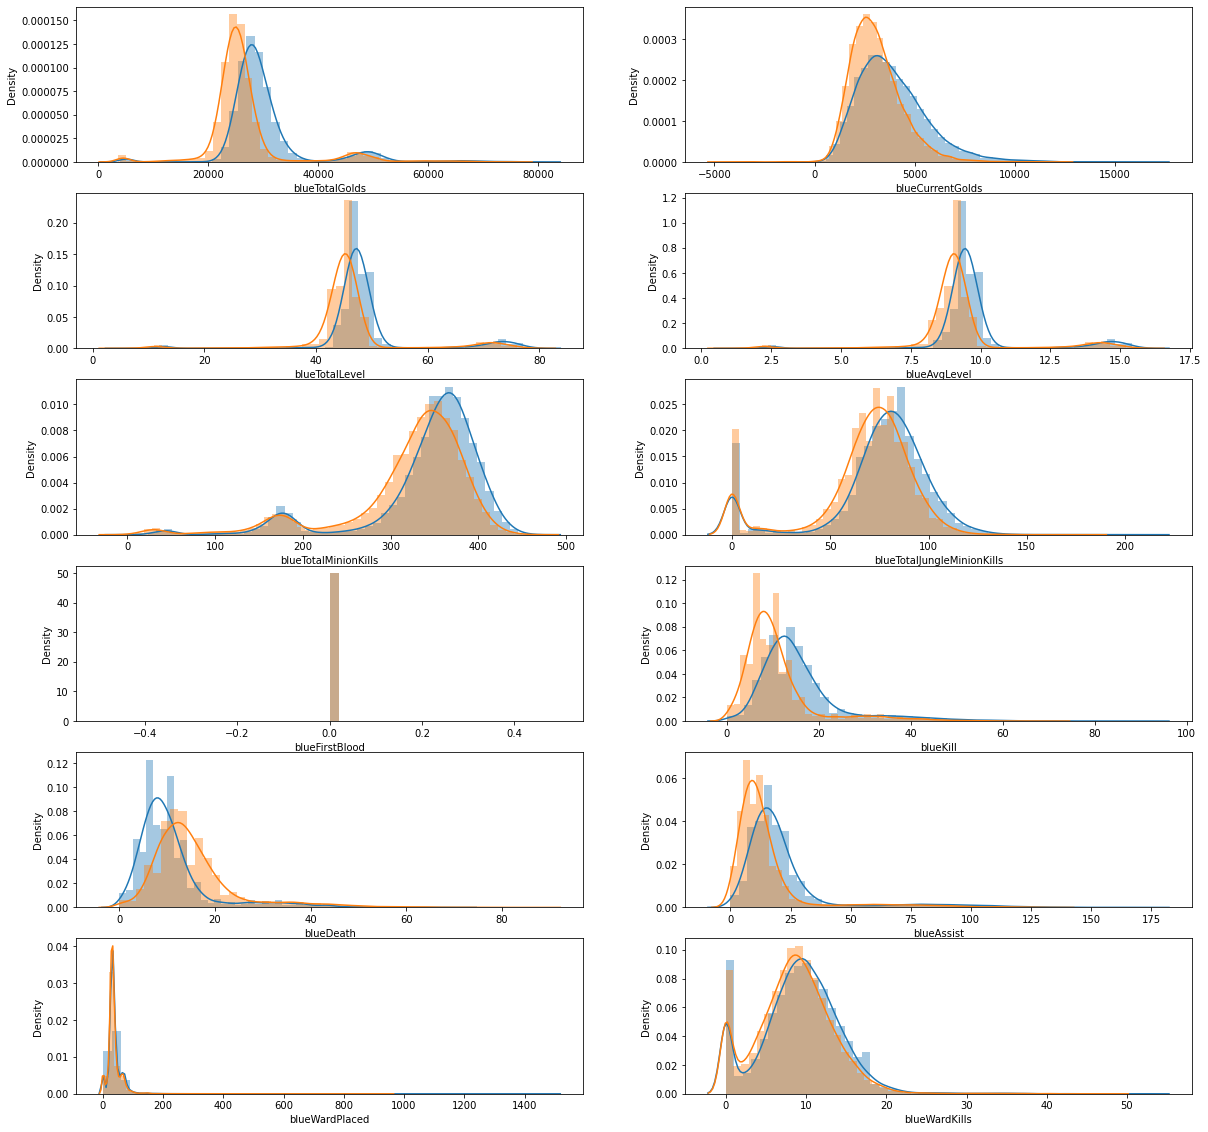

In [29]:
a_list = [0,0,1,1,2,2,3,3,4,4,5,5]
b_list = [0,1,0,1,0,1,0,1,0,1,0,1] 

fig, axs = plt.subplots(nrows = 6, ncols = 2, figsize = (20, 20))

for col, a, b in zip(col_list, a_list, b_list):  
    sns.distplot(winer_blue_lol[col], kde = True,  label = 'winer', ax = axs[a][b])
    sns.distplot(loser_blue_lol[col], kde = True, label = 'loser', ax = axs[a][b])
    axs[a][b].legend

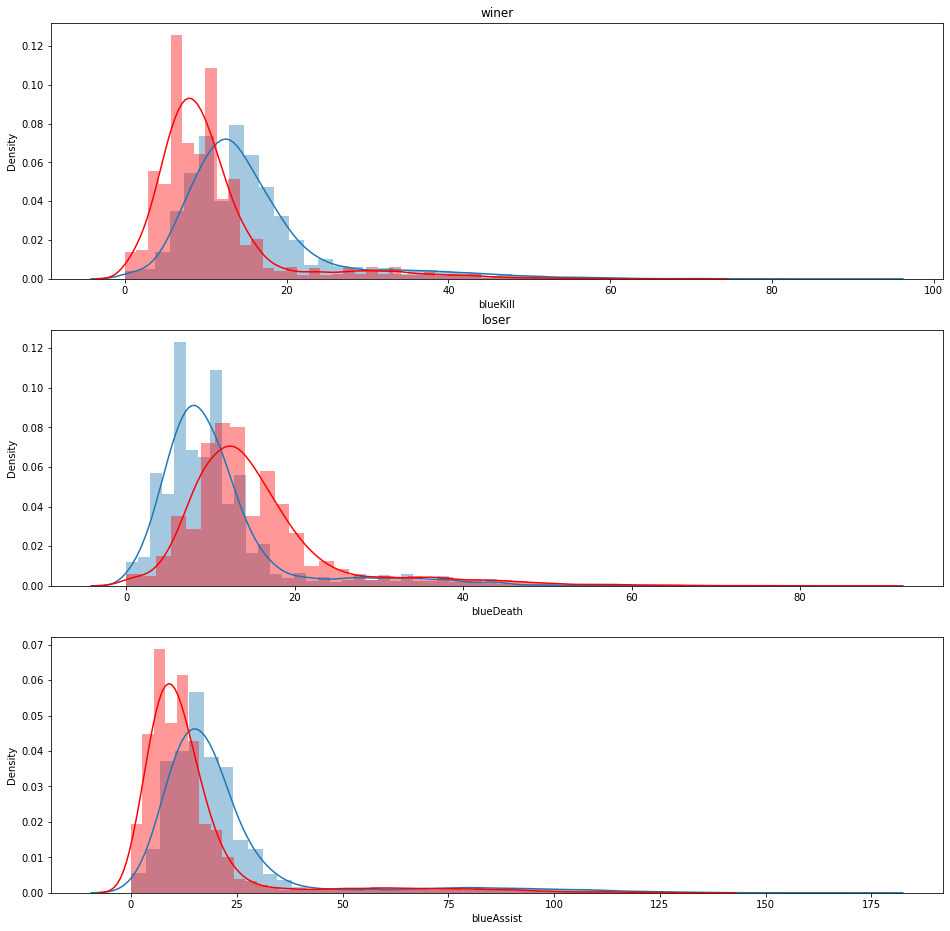

In [62]:
fig, axs = plt.subplots(nrows=3, ncols = 1, figsize = (16,16))

sns.distplot(winer_blue_lol["blueKill"], kde = True, ax = axs[0])
sns.distplot(loser_blue_lol["blueKill"], kde = True, ax = axs[0], color = 'red')

sns.distplot(winer_blue_lol["blueDeath"], kde = True, ax = axs[1])
sns.distplot(loser_blue_lol["blueDeath"], kde = True, ax = axs[1], color = 'red')

sns.distplot(winer_blue_lol["blueAssist"], kde = True, ax = axs[2])
sns.distplot(loser_blue_lol["blueAssist"], kde = True, ax = axs[2], color = 'red')


axs[0].set_title('winer')
axs[1].set_title('loser')

plt.savefig('KDA.jpg')

In [59]:
print("이겼을 때:", winer_blue_lol["blueTotalMinionKills"].mean())
print("졌을 때:", loser_blue_lol["blueTotalMinionKills"].mean())

이겼을 때: 342.51333631351514
졌을 때: 319.8490903668357


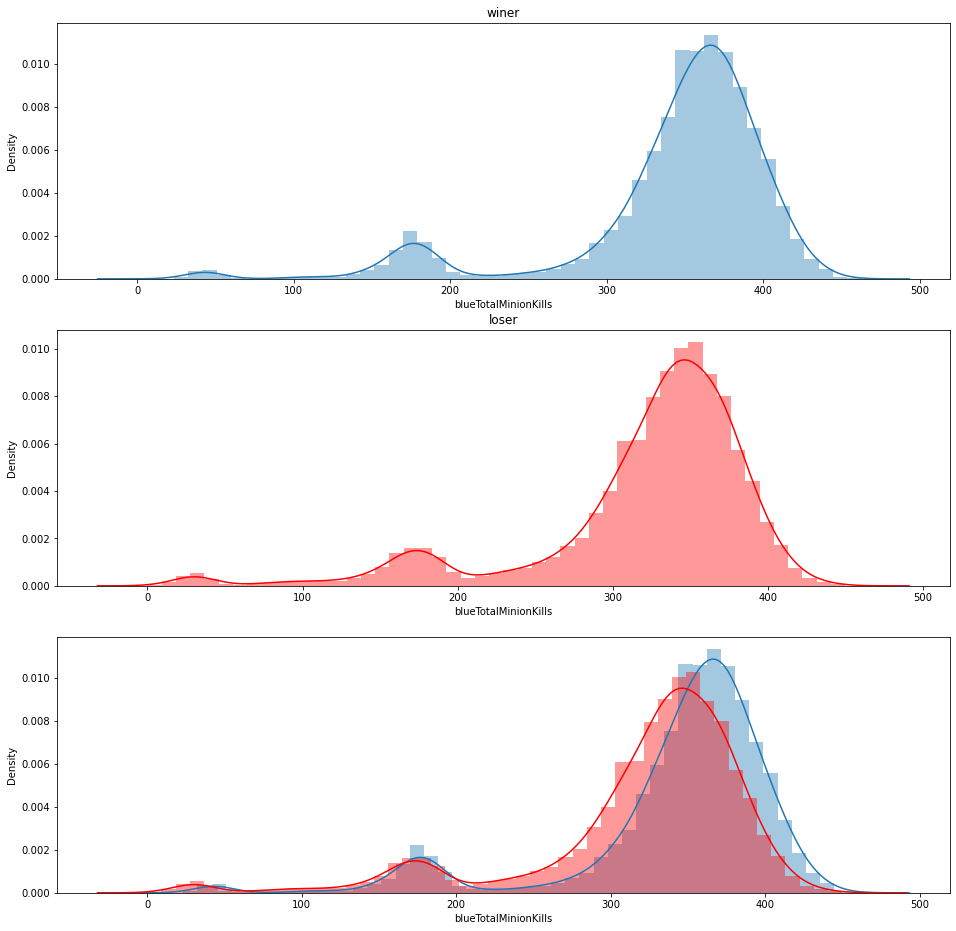

In [60]:
fig, axs = plt.subplots(nrows=3, ncols = 1, figsize = (16,16))

sns.distplot(winer_blue_lol["blueTotalMinionKills"], kde = True, ax = axs[0])
sns.distplot(loser_blue_lol["blueTotalMinionKills"], kde = True, ax = axs[1], color = 'red')

sns.distplot(winer_blue_lol["blueTotalMinionKills"], kde = True, ax = axs[2])
sns.distplot(loser_blue_lol["blueTotalMinionKills"], kde = True, ax = axs[2], color = 'red')


# axs[0].set_title('winer')
# axs[1].set_title('loser')

# plt.savefig('.jpg')

# 실험 -------------

## 이겼을 때와 졌을 때의 팀 레벨 총합의 분포도

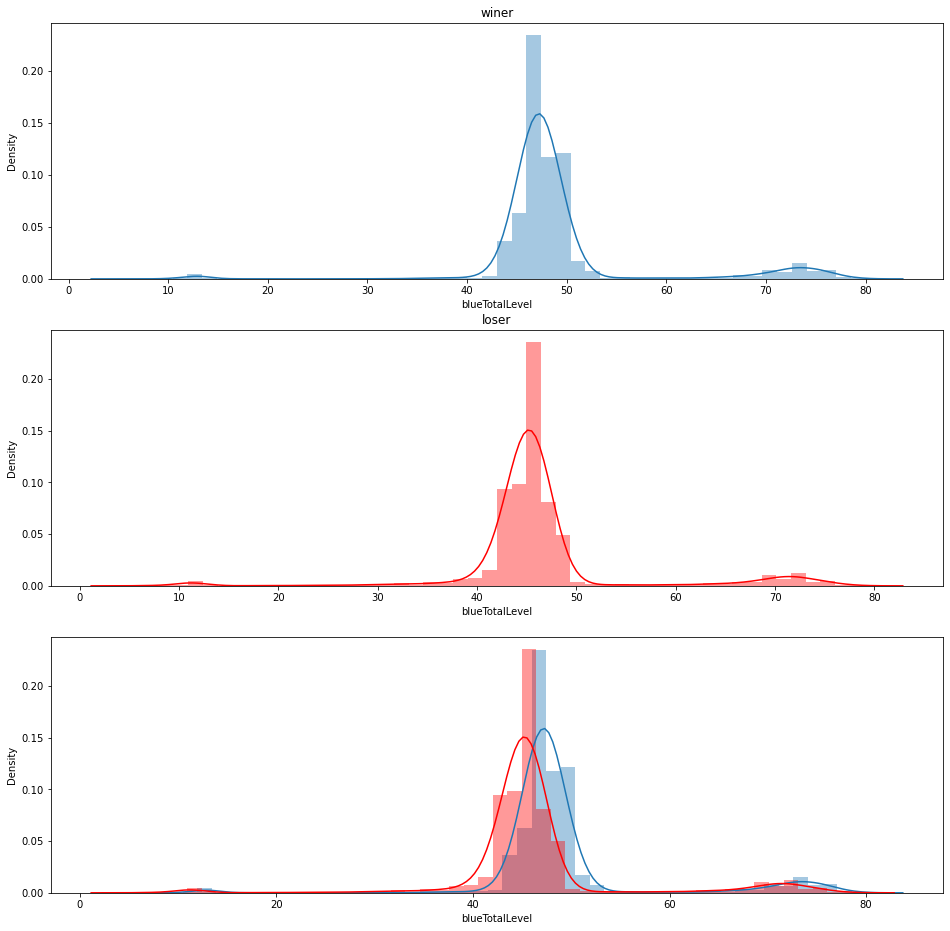

In [57]:
fig, axs = plt.subplots(nrows=3, ncols = 1, figsize = (16,16))

sns.distplot(winer_blue_lol["blueTotalLevel"], kde = True, ax = axs[0])
sns.distplot(loser_blue_lol["blueTotalLevel"], kde = True, ax = axs[1], color = 'red')

sns.distplot(winer_blue_lol["blueTotalLevel"], kde = True, ax = axs[2])
sns.distplot(loser_blue_lol["blueTotalLevel"], kde = True, ax = axs[2], color = 'red')


axs[0].set_title('winer')
axs[1].set_title('loser')

plt.savefig('레벨.jpg')

## 블루팀이 이겼을 때와 졌을 때의 팀 총합 레벨 평균 차이에 대한 검정

In [8]:
# 모집단 1 : 모든 챌린져 구간에서 블루팀이 이긴 경기
# 모집단 2 : 모든 챌린져 구간에서 블루팀이 진 경기
# 샘플 1 : 챌린져 구간에서 블루팀이 이겼을 때의 표본
# 샘플 2 : 챌린져 구간에서 블루팀이 졌을 때의 표본

### 정규성 테스트

In [9]:
# 블루팀이 이겼을 때와 졌을 때의 표본이 정규분포를 따르는지 확인하기 위해 shapiro-test를 실시합니다.
# 귀무가설 : 데이터가 정규분포를 따른다.
# 대립가설 : 데이터가 정규분포를 따르지 않는다.

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro

print(shapiro(winer_blue_lol["blueTotalLevel"]))
print(shapiro(loser_blue_lol["blueTotalLevel"]))

# 두 표본 모두 p-value가 유의수준(0.05)보다 작게 나왔습니다.
# 귀무가설을 기각하고 대립가설을 채택합니다.
# 두 표본은 모두 정규분포를 따르지 않습니다.

ShapiroResult(statistic=0.6183658242225647, pvalue=0.0)
ShapiroResult(statistic=0.6649855971336365, pvalue=0.0)


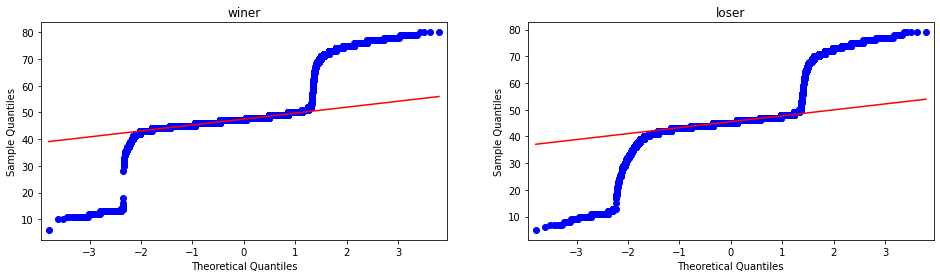

In [10]:
# 이긴팀, 진팀의 표본을 qq-plot을 그려서 정규분포가 맞는지 확인해봅니다.
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))

sm.qqplot(winer_blue_lol["blueTotalLevel"], line='q', dist = stats.norm, ax = axs[0])
sm.qqplot(loser_blue_lol["blueTotalLevel"], line='q', dist = stats.norm, ax = axs[1])

axs[0].set_title('winer')
axs[1].set_title('loser')

plt.show()

### 등분산검정

In [11]:
# 이분산 검정을 할지 동분산 검정을 할지 판단하기 위해서 Bartlett-test로 등분산 검정을 시행합니다.
# levene-test는 정규성 가정을 만족하지 않아도 시행 가능합니다.

import scipy.stats 
scipy.stats.levene(winer_blue_lol["blueTotalLevel"], loser_blue_lol["blueTotalLevel"])

# 귀무가설 : 모분산1 = 모분산2
# 대립가설 : 모분산1 <> 모분산2
# 등분산 검정 levene-test 수행결과 귀무가설을 채택합니다.
# 두 모집단의 분산은 같습니다. 

LeveneResult(statistic=3.7419320835723324, pvalue=0.053073554246462346)

### 팀 레벨 총합 평균 차이에 대한 t-test

In [12]:
# 위에서는 두 데이터가 정규분포를 따르지 않지만 중심극한정리에 의해 표본평균의 분포가 근사적으로 정규분포를 따른다고 가정합니다.

# 블루팀이 이겼을 때의 표본과 졌을 때의 표본을 서로 독립 표본이라고 가정
# 독립표본 동분산 t-test를 수행합니다.

scipy.stats.ttest_ind(winer_blue_lol["blueTotalLevel"], loser_blue_lol["blueTotalLevel"], equal_var=True)

# 독립표본 t-test
# 귀무가설 : 두 집단의 모평균은 동일
# 대립가설 : 두 집단의 모평균을 서로 다르다.

Ttest_indResult(statistic=26.863361837845922, pvalue=7.013842787855202e-157)

# 블루팀 총합 레벨이 20이하, 60이상은 데이터에서 삭제해줍니다.

In [13]:
blue_lol

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,[],0,0,0,0,0,0,[],0,0
1,1,24162,2212,46,9.2,393,64,0,5,6,...,[],0,0,0,0,0,0,[],0,1
2,0,22413,1563,41,8.2,300,62,0,5,20,...,[],0,0,0,0,0,0,[],0,0
3,0,23837,3197,46,9.2,370,96,0,6,13,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
4,1,27688,3663,44,8.8,381,66,0,9,10,...,[],1,0,1,0,0,1,['WATER_DRAGON'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,[],0,0,0,0,0,0,['EARTH_DRAGON'],1,0
26830,0,57503,3293,62,12.4,329,28,0,27,37,...,['TOP_LANE'],5,3,2,0,1,1,"['WATER_DRAGON', 'AIR_DRAGON', 'FIRE_DRAGON']",3,0
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,[],0,0,0,0,0,1,['FIRE_DRAGON'],1,0


In [14]:
# 블루팀 데이터에서 팀총합 레벨이 30이하, 60이상인 게임은 제거해서 blue_lol_out에 담아줍니다.
blue_lol_out = blue_lol[(blue_lol["blueTotalLevel"] > 30) & (blue_lol["blueTotalLevel"] < 60)]
blue_lol_out

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueFirstTowerLane,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,[],0,0,0,0,0,0,[],0,0
1,1,24162,2212,46,9.2,393,64,0,5,6,...,[],0,0,0,0,0,0,[],0,1
2,0,22413,1563,41,8.2,300,62,0,5,20,...,[],0,0,0,0,0,0,[],0,0
3,0,23837,3197,46,9.2,370,96,0,6,13,...,[],0,0,0,0,0,1,['AIR_DRAGON'],1,0
4,1,27688,3663,44,8.8,381,66,0,9,10,...,[],1,0,1,0,0,1,['WATER_DRAGON'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,['BOT_LANE'],1,0,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,0
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,[],0,0,0,0,0,0,['EARTH_DRAGON'],1,0
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,[],0,0,0,0,0,1,['FIRE_DRAGON'],1,0


In [15]:
# 2662개의 row를 제거해줬습니다.
26834 - 24172

2662

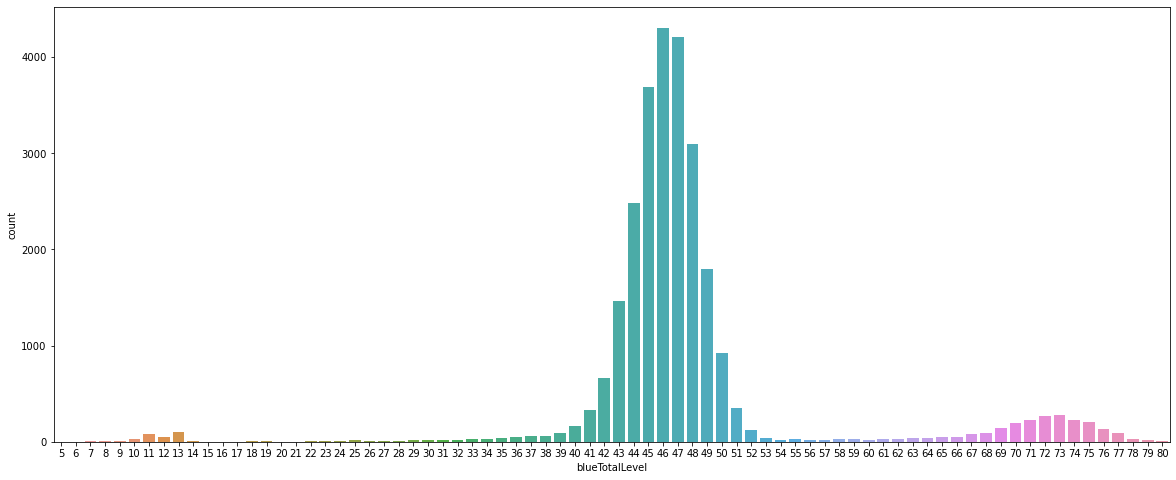

In [16]:
# 팀총합 레벨 이상치를 제거해준 blueTotalLevel를 시각화합니다.

plt.figure(figsize=(20,8))
sns.countplot(x = lol['blueTotalLevel'], data = lol)

plt.savefig('level.jpg')

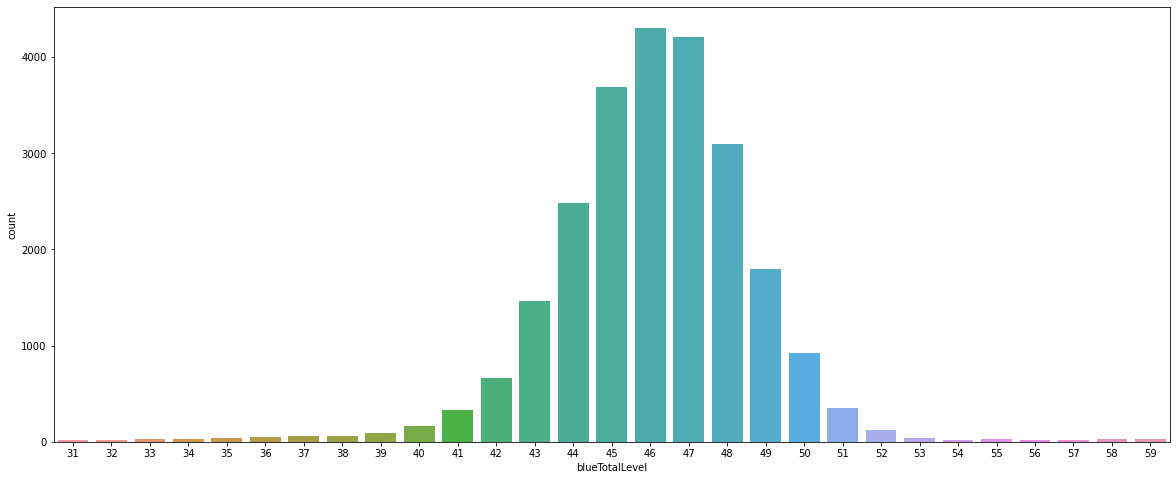

In [17]:
# 팀총합 레벨 이상치를 제거해준 blueTotalLevel를 시각화합니다.

plt.figure(figsize=(20,8))
sns.countplot(x = blue_lol_out['blueTotalLevel'], data = blue_lol_out)

plt.savefig('level.jpg')

# blueWins 칼럼 0,1을 str으로 표현한 str_blueWins을 만듭니다.

In [18]:
blue_lol_out['blueWins'].value_counts()

1    12093
0    12079
Name: blueWins, dtype: int64

In [19]:
blue_lol_out['str_blueWins'] = blue_lol_out['blueWins'].map({0:'lose', 1:'win'}) 
blue_lol_out[['str_blueWins', 'blueWins']]

,str_blueWins,blueWins
0,lose,0
1,win,1
2,lose,0
3,lose,0
4,win,1
...,...,...
26828,win,1
26829,lose,0
26831,lose,0
26832,win,1


<AxesSubplot:xlabel='blueAvgLevel', ylabel='count'>

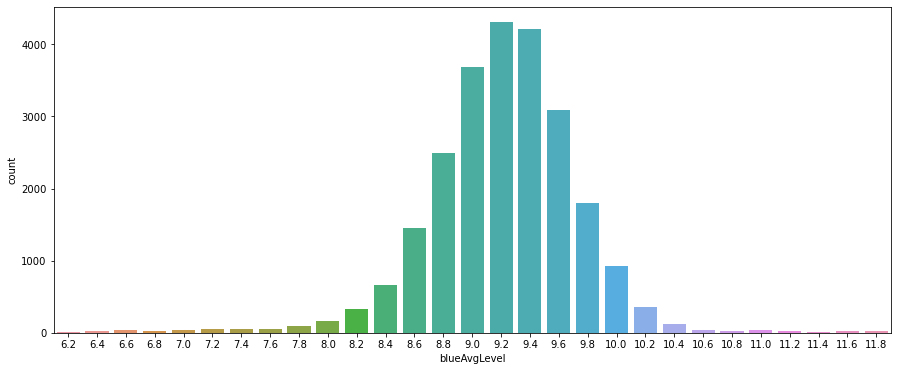

In [20]:
# 팀원 평균 레벨 시각화
plt.figure(figsize = (15, 6))
sns.countplot(x = 'blueAvgLevel', data = blue_lol_out)

<AxesSubplot:xlabel='blueAvgLevel', ylabel='count'>

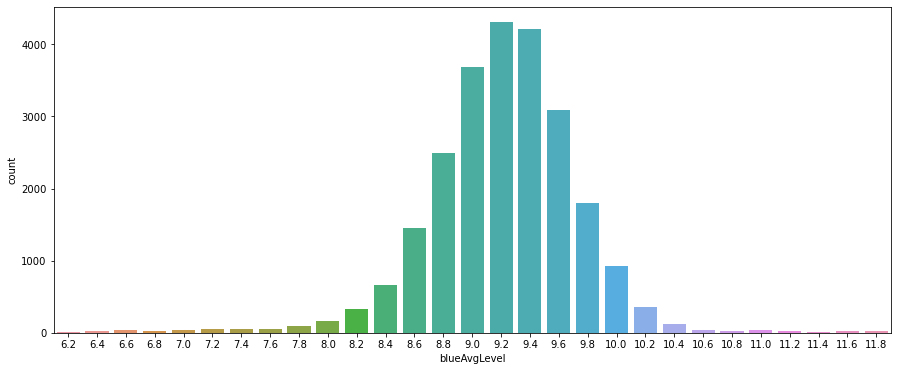

In [21]:
# 팀원 평균 레벨 시각화
plt.figure(figsize = (15, 6))
sns.countplot(x = 'blueAvgLevel', data = blue_lol_out)

<AxesSubplot:xlabel='blueTotalGolds', ylabel='blueKill'>

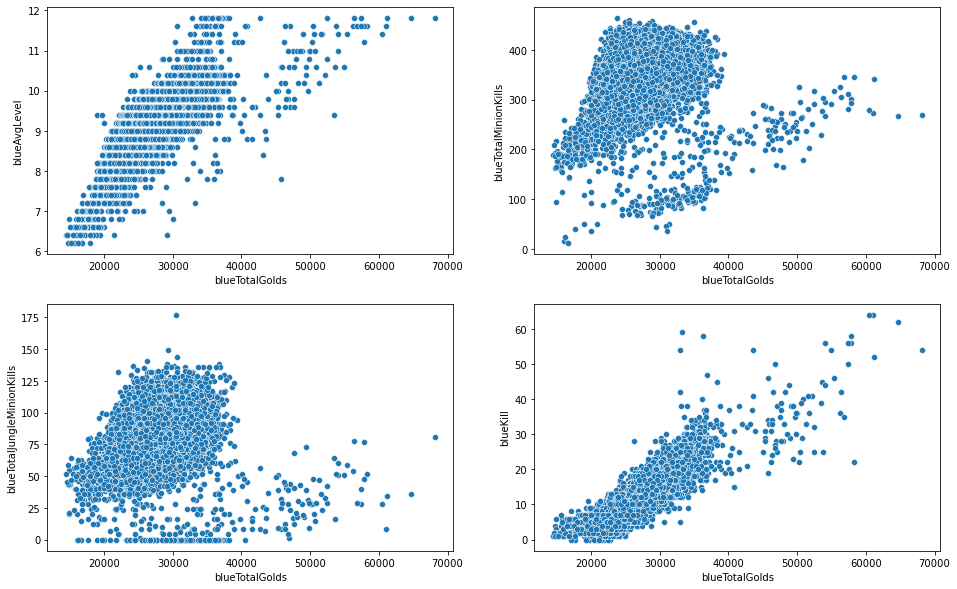

In [22]:
# 총 골드량과 팀원 평균 레벨, 미니언 킬수, 정글몹 킬수, 상대팀 킬수와의 상관관계
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))

sns.scatterplot(x = 'blueTotalGolds', y = 'blueAvgLevel', data = blue_lol_out, ax = axs[0][0])
sns.scatterplot(x = 'blueTotalGolds', y = 'blueTotalMinionKills', data = blue_lol_out, ax = axs[0][1])
sns.scatterplot(x = 'blueTotalGolds', y = 'blueTotalJungleMinionKills', data = blue_lol_out, ax = axs[1][0])
sns.scatterplot(x = 'blueTotalGolds', y = 'blueKill', data = blue_lol_out, ax = axs[1][1])

<AxesSubplot:xlabel='blueDragon', ylabel='blueWins'>

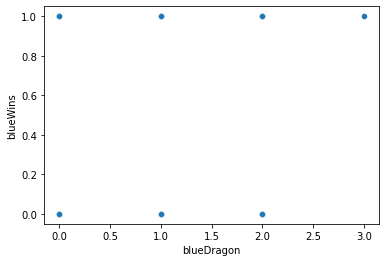

In [23]:
# 15분안에 드래곤 3번 먹으면 무조건 이긴다.
sns.scatterplot(x = 'blueDragon', y = 'blueWins', data = blue_lol_out)

In [24]:
# 드래곤을 3번 먹은 경기는 1개 밖에 없다.
blue_lol_out[blue_lol_out['blueDragon'] == 3]

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds,str_blueWins
11969,1,57799,1691,58,11.6,302,48,0,56,25,...,5,3,1,1,0,1,"['AIR_DRAGON', 'EARTH_DRAGON', 'WATER_DRAGON']",3,0,win


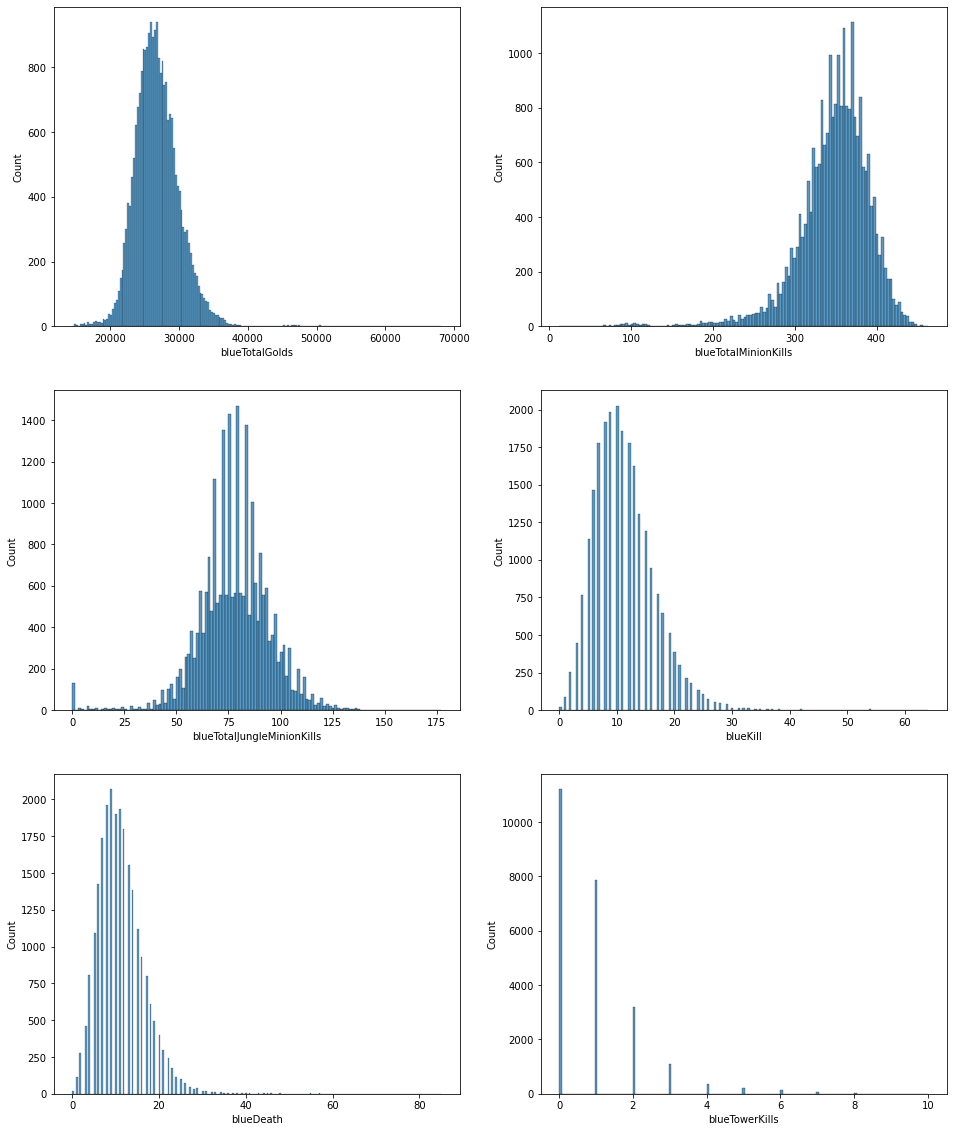

In [55]:
fig, axs = plt.subplots(nrows = 3, ncols= 2, figsize = (16, 20))

sns.histplot(x = 'blueTotalGolds', data = blue_lol_out, ax = axs[0][0])
sns.histplot(x = 'blueTotalMinionKills', data = blue_lol_out, ax = axs[0][1])
sns.histplot(x = 'blueTotalJungleMinionKills', data = blue_lol_out, ax = axs[1][0])
sns.histplot(x = 'blueKill', data = blue_lol_out, ax = axs[1][1])
sns.histplot(x = 'blueDeath', data = blue_lol_out, ax = axs[2][0])
sns.histplot(x = 'blueTowerKills', data = blue_lol_out, ax = axs[2][1])

plt.savefig('레벨.jpg')

# 용 3번 먹은 데이터는 제거합니다.

In [26]:
blue_lol_out['blueDragon'].value_counts()

0    11027
1     9311
2     3833
3        1
Name: blueDragon, dtype: int64

In [27]:
blue_lol_out['blueDragon'][blue_lol_out['blueDragon'] == 3]

11969    3
Name: blueDragon, dtype: int64

In [28]:
blue_lol_out

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds,str_blueWins
0,0,24081,1190,44,8.8,309,74,0,8,14,...,0,0,0,0,0,0,[],0,0,lose
1,1,24162,2212,46,9.2,393,64,0,5,6,...,0,0,0,0,0,0,[],0,1,win
2,0,22413,1563,41,8.2,300,62,0,5,20,...,0,0,0,0,0,0,[],0,0,lose
3,0,23837,3197,46,9.2,370,96,0,6,13,...,0,0,0,0,0,1,['AIR_DRAGON'],1,0,lose
4,1,27688,3663,44,8.8,381,66,0,9,10,...,1,0,1,0,0,1,['WATER_DRAGON'],1,1,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,1,0,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,0,win
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,0,0,0,0,0,0,['EARTH_DRAGON'],1,0,lose
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,1,0,1,0,0,0,[],0,0,lose
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,0,0,0,0,1,['FIRE_DRAGON'],1,0,win


In [29]:
blue_lol_out = blue_lol_out[blue_lol_out['blueDragon'] < 3]
blue_lol_out

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds,str_blueWins
0,0,24081,1190,44,8.8,309,74,0,8,14,...,0,0,0,0,0,0,[],0,0,lose
1,1,24162,2212,46,9.2,393,64,0,5,6,...,0,0,0,0,0,0,[],0,1,win
2,0,22413,1563,41,8.2,300,62,0,5,20,...,0,0,0,0,0,0,[],0,0,lose
3,0,23837,3197,46,9.2,370,96,0,6,13,...,0,0,0,0,0,1,['AIR_DRAGON'],1,0,lose
4,1,27688,3663,44,8.8,381,66,0,9,10,...,1,0,1,0,0,1,['WATER_DRAGON'],1,1,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,1,0,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,0,win
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,0,0,0,0,0,0,['EARTH_DRAGON'],1,0,lose
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,1,0,1,0,0,0,[],0,0,lose
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,0,0,0,0,1,['FIRE_DRAGON'],1,0,win


# 임시

<AxesSubplot:xlabel='blueDragon', ylabel='count'>

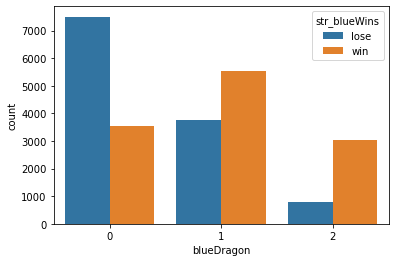

In [30]:
sns.countplot(x = 'blueDragon', hue = 'str_blueWins', data = blue_lol_out)

In [31]:
print(blue_lol_out['blueDragon'].value_counts())
print("")
print(blue_lol_out['blueRiftHeralds'].value_counts())

0    11027
1     9311
2     3833
Name: blueDragon, dtype: int64

0    12066
1    12059
2       46
Name: blueRiftHeralds, dtype: int64


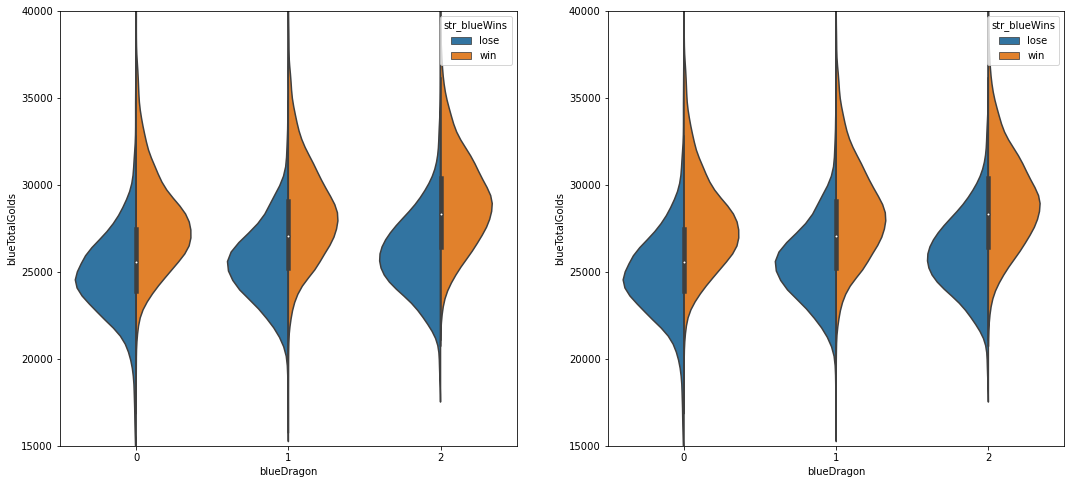

In [32]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot('blueDragon', 'blueTotalGolds', hue = 'str_blueWins',
data = blue_lol_out, split = True, ax = ax[0])
ax[0].set_ylim(15000, 40000)

sns.violinplot('blueDragon', 'blueTotalGolds', hue = 'str_blueWins',
data = blue_lol_out, split = True, ax = ax[1])
ax[1].set_ylim(15000, 40000)

plt.show()

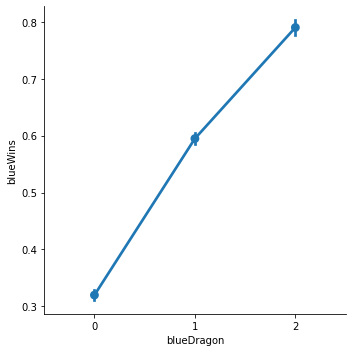

In [33]:
sns.factorplot('blueDragon', 'blueWins', data = blue_lol_out)
plt.show()

# 억제기를 3번 깬 데이터는 지워줍니다.

In [34]:
blue_lol_out['blueInhibitor'].value_counts()

0    23814
1      341
2       15
3        1
Name: blueInhibitor, dtype: int64

In [35]:
blue_lol_out = blue_lol_out[blue_lol_out['blueInhibitor'] < 3]
blue_lol_out

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds,str_blueWins
0,0,24081,1190,44,8.8,309,74,0,8,14,...,0,0,0,0,0,0,[],0,0,lose
1,1,24162,2212,46,9.2,393,64,0,5,6,...,0,0,0,0,0,0,[],0,1,win
2,0,22413,1563,41,8.2,300,62,0,5,20,...,0,0,0,0,0,0,[],0,0,lose
3,0,23837,3197,46,9.2,370,96,0,6,13,...,0,0,0,0,0,1,['AIR_DRAGON'],1,0,lose
4,1,27688,3663,44,8.8,381,66,0,9,10,...,1,0,1,0,0,1,['WATER_DRAGON'],1,1,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,1,0,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,0,win
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,0,0,0,0,0,0,['EARTH_DRAGON'],1,0,lose
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,1,0,1,0,0,0,[],0,0,lose
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,0,0,0,0,1,['FIRE_DRAGON'],1,0,win


In [36]:
blue_lol_out['blueInhibitor'].value_counts()

0    23814
1      341
2       15
Name: blueInhibitor, dtype: int64

# 블루팀의 용먹은 횟수에 따른 승률 변화

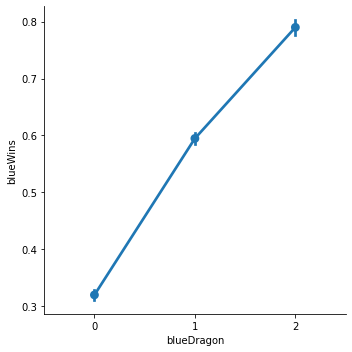

In [37]:
sns.factorplot('blueDragon', 'blueWins', data = blue_lol_out)
plt.show()

# 블루팀의 정령 먹은 횟수에 따른 승률 변화

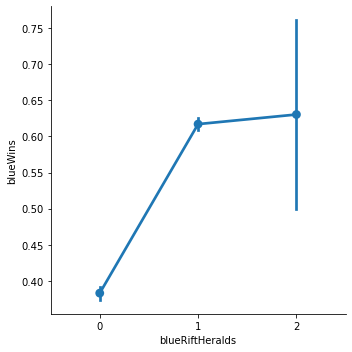

In [38]:
sns.factorplot('blueRiftHeralds', 'blueWins', data = blue_lol_out)

# 블루팀이 각 라인별 타워 부순 개수

In [39]:
print("탑타워 부순 개수")
print(blue_lol_out['blueTopTowerKills'].value_counts())
print("")

print("미드타워 부순 개수")
print(blue_lol_out['blueMidTowerKills'].value_counts().sort_index())
print("")

print("봇타워 부순 개수")
print(blue_lol_out['blueBotTowerKills'].value_counts())

탑타워 부순 개수
0    17142
1     6209
2      754
3       65
Name: blueTopTowerKills, dtype: int64

미드타워 부순 개수
0    19449
1     3746
2      562
3      169
4      105
5      139
Name: blueMidTowerKills, dtype: int64

봇타워 부순 개수
0    17458
1     6299
2      358
3       55
Name: blueBotTowerKills, dtype: int64


# 블루팀의 탑타워 부순 개수에 따른 승률 변화

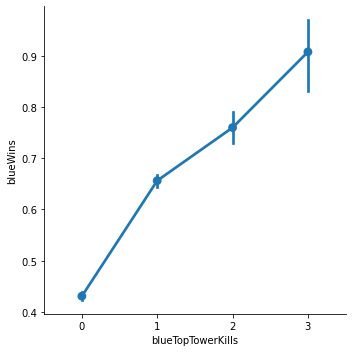

In [40]:
sns.factorplot(x = 'blueTopTowerKills', y = 'blueWins', data = blue_lol_out)

# 블루팀의 미드타워 부순 개수에 따른 승률 변화

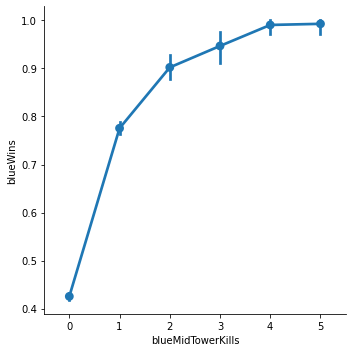

In [41]:
sns.factorplot(x = 'blueMidTowerKills', y = 'blueWins', data = blue_lol_out)

# 블루팀의 봇타워 부순 개수에 따른 승률 변화

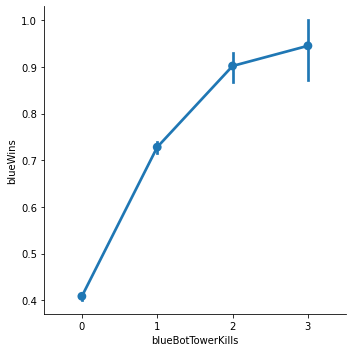

In [42]:
sns.factorplot(x = 'blueBotTowerKills', y = 'blueWins', data = blue_lol_out)

In [43]:
blue_lol_out

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragnoType,blueDragon,blueRiftHeralds,str_blueWins
0,0,24081,1190,44,8.8,309,74,0,8,14,...,0,0,0,0,0,0,[],0,0,lose
1,1,24162,2212,46,9.2,393,64,0,5,6,...,0,0,0,0,0,0,[],0,1,win
2,0,22413,1563,41,8.2,300,62,0,5,20,...,0,0,0,0,0,0,[],0,0,lose
3,0,23837,3197,46,9.2,370,96,0,6,13,...,0,0,0,0,0,1,['AIR_DRAGON'],1,0,lose
4,1,27688,3663,44,8.8,381,66,0,9,10,...,1,0,1,0,0,1,['WATER_DRAGON'],1,1,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,1,0,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,0,win
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,0,0,0,0,0,0,['EARTH_DRAGON'],1,0,lose
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,1,0,1,0,0,0,[],0,0,lose
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,0,0,0,0,1,['FIRE_DRAGON'],1,0,win


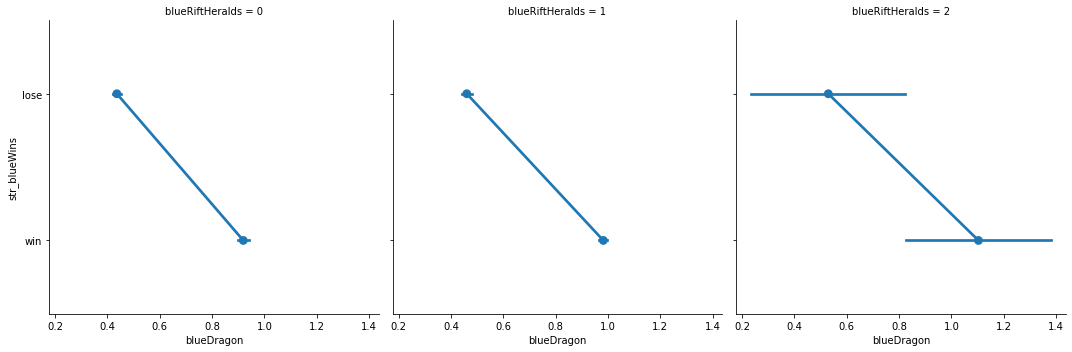

In [44]:
sns.factorplot(x = 'blueDragon', y = 'str_blueWins', col = 'blueRiftHeralds', data = blue_lol_out)

In [45]:
blue_lol_out['blueWardPlaced']

0         29
1         31
2         28
3        108
4         36
        ... 
26828     31
26829     38
26831     40
26832     33
26833     67
Name: blueWardPlaced, Length: 24170, dtype: int64

<AxesSubplot:xlabel='blueWardPlaced', ylabel='Count'>

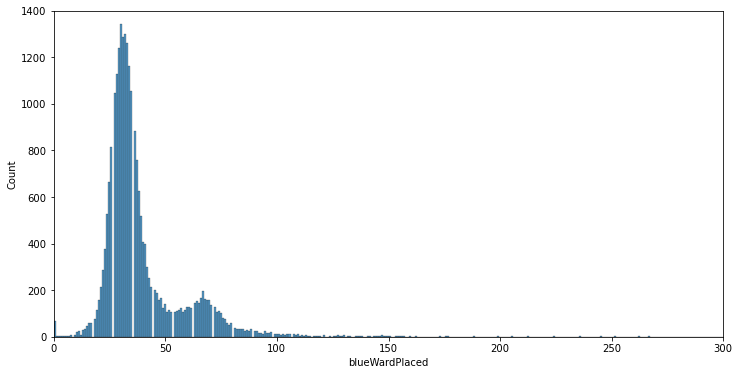

In [46]:
plt.figure(figsize=(12,6))
plt.xlim(0,300)
plt.ylim(0,1400)

sns.histplot( x = 'blueWardPlaced', data = blue_lol_out)

<AxesSubplot:xlabel='blueDragon', ylabel='blueWardPlaced'>

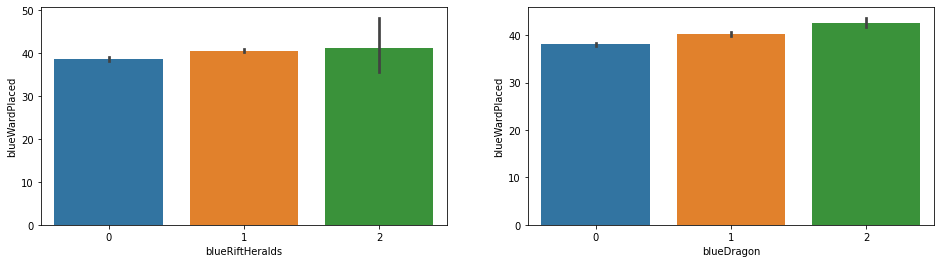

In [47]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))

sns.barplot(x = 'blueRiftHeralds', y = 'blueWardPlaced', data = blue_lol_out, ax = axs[0])
sns.barplot(x = 'blueDragon', y = 'blueWardPlaced', data = blue_lol_out, ax = axs[1])

<AxesSubplot:xlabel='blueWins', ylabel='blueWardPlaced'>

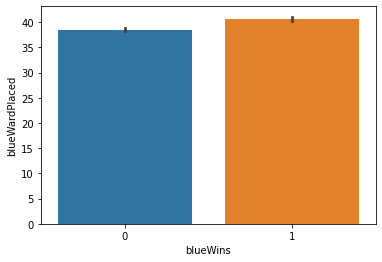

In [48]:
sns.barplot(x = 'blueWins', y = 'blueWardPlaced', data = blue_lol_out)

<AxesSubplot:xlabel='blueTotalMinionKills', ylabel='blueTotalJungleMinionKills'>

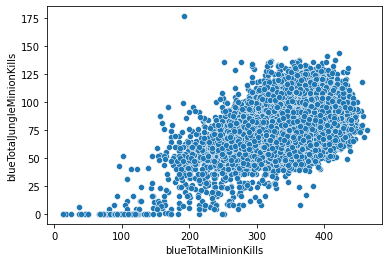

In [49]:
sns.scatterplot(x = 'blueTotalMinionKills', y = 'blueTotalJungleMinionKills', data = blue_lol_out)

<AxesSubplot:xlabel='blueRiftHeralds', ylabel='blueWardPlaced'>

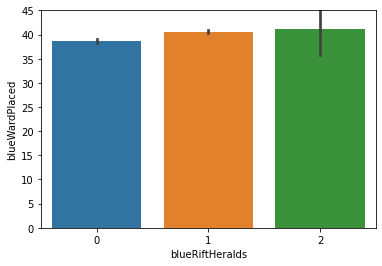

In [50]:
plt.ylim(0,45)
sns.barplot(x = 'blueRiftHeralds', y = 'blueWardPlaced', data = blue_lol_out)

In [51]:
blue_lol_out['blueFirstInhibitor'].value_counts()

0    23825
1      345
Name: blueFirstInhibitor, dtype: int64

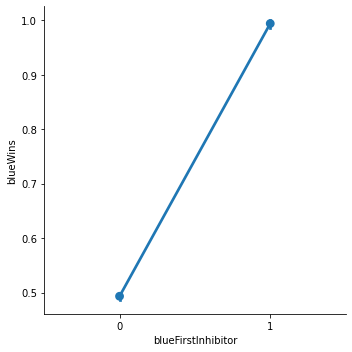

In [52]:
sns.factorplot(x = 'blueFirstInhibitor', y = 'blueWins', data = blue_lol_out)

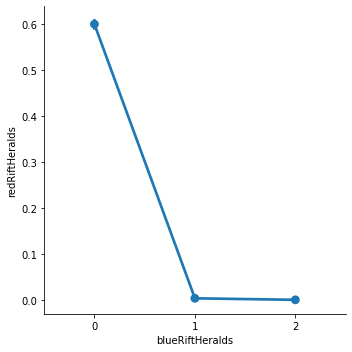

In [53]:
sns.factorplot(x = 'blueRiftHeralds', y = 'redRiftHeralds', data = lol)

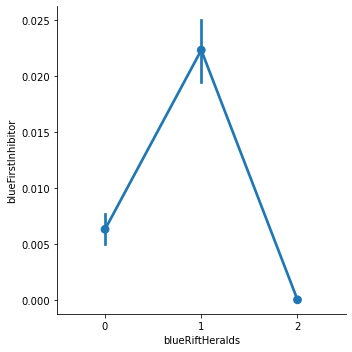

In [54]:
sns.factorplot(x = 'blueRiftHeralds', y = 'blueFirstInhibitor', data = blue_lol_out)